Léa Heiniger  
29.09.2022 

# Data Science Classwork - Seminar 1

In [1]:
print("Hello world!")

Hello world!


In [2]:
import numpy as np

Numpy is a library which you will use a lot during your Python practice.

In [3]:
a=np.array(range(2,8,3))
a

array([2, 5])

In [4]:
a.shape

(2,)

In [5]:
a=a.reshape(-1,1)
a

array([[2],
       [5]])

In [6]:
a.shape

(2, 1)

In [7]:
a.T

array([[2, 5]])

In [8]:
a.T.shape

(1, 2)

In [9]:
a.T*a

array([[ 4, 10],
       [10, 25]])

In [10]:
a.T @ a

array([[29]])

**Vectors using numpy**

Create vectors of a given shape (5,1) using [np.ones](https://numpy.org/doc/stable/reference/generated/numpy.ones.html), [np.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) and [np.random.rand](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html)


In [11]:
shape = (5,1)

In [12]:
#ones
vectors = np.ones(shape)
vectors

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [13]:
#zeros
vectors = np.zeros(shape)
vectors

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [14]:
#random
vectors = np.random.rand(5,1)
vectors

array([[0.06367993],
       [0.73824995],
       [0.85823271],
       [0.36816833],
       [0.50667316]])

**Represantation space with data vectors** (slides 8-9)

The D-dimensional space is divided into equivalent bins.
Show that the probability to have a not empty bin decreases while dimentionality rises. 

In [15]:
b = 10 #bins
n = 5 #samples per bim we want
D = 3 #representation space dimensionality

# To find out L, refer to the lectures
L = n*(b**D)#vectors we need to genenrate to have n sampels per bin
L

5000

In [16]:
shape=(L, D)

Generate X as random matrix of a given shape

In [17]:
X = np.random.rand(L,D)
X[:6]

array([[0.28478621, 0.67991434, 0.81163179],
       [0.86620327, 0.96408913, 0.31478527],
       [0.72915779, 0.6705772 , 0.02514662],
       [0.85255095, 0.07314783, 0.82236418],
       [0.71090314, 0.55419853, 0.8490974 ],
       [0.45452644, 0.75132173, 0.52234015]])

Using [np.histogramdd](https://numpy.org/doc/stable/reference/generated/numpy.histogramdd.html) make a D-dimensional histogram for bins=b. It should return an array of size (b, b, ..., b) where each element is equal to number of samples in the bin.

In [18]:
h, _ = np.histogramdd(X)

In [19]:
assert h.shape == (10, 10, 10)

In [20]:
h[0]

array([[ 5., 10.,  2.,  7.,  6.,  6.,  3.,  8.,  4.,  7.],
       [ 4.,  5.,  4.,  8.,  4.,  5.,  4.,  7.,  3.,  6.],
       [12.,  5.,  6.,  4.,  4.,  6.,  5.,  4.,  7., 10.],
       [ 3.,  3., 11.,  3.,  7.,  5.,  8.,  8.,  6.,  4.],
       [ 4.,  7., 10.,  4.,  5.,  9.,  4.,  3.,  6.,  4.],
       [ 5.,  3.,  5.,  2.,  5.,  4.,  7.,  5.,  6.,  1.],
       [ 4.,  6.,  5.,  2.,  4.,  5.,  6.,  3.,  3.,  7.],
       [ 3.,  1.,  9.,  6.,  2.,  7.,  7.,  5., 10.,  7.],
       [ 7.,  4.,  9.,  7.,  5.,  4.,  6.,  8.,  2.,  4.],
       [ 3.,  4.,  6.,  5.,  4.,  7.,  5.,  6.,  8.,  2.]])

In [21]:
D_range = range(1,8)
h_values = []
N = L
for D in D_range:
  shape=(N, D)
  X = np.random.rand(N, D)
  h, _ = np.histogramdd(X)
  h_mean = np.mean(h)
  p = h_mean/N
  h_values.append(h_mean)

In [22]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Average sample in the bin')

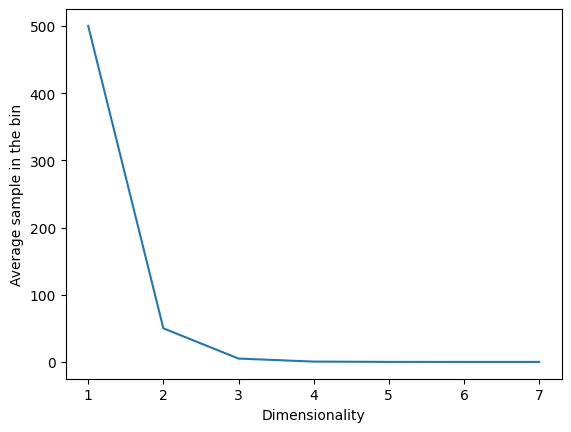

In [23]:
plt.plot(D_range, h_values)
plt.xlabel("Dimensionality")
plt.ylabel("Average sample in the bin")

**Hypersphere and hypercube** (slides 10-11)

Hypercube [-r, r] in D dimensional space. We draw N points uniformly from it. Show how many points will fall in the hypersphere which center is in the origin and radius is r.

Generate N uniform samples from hypercube [-r,r] in D-dimensional space using [np.random.uniform ](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html)

In [24]:
N = 100
D = 3
r = 0.3

In [28]:
cube_samples = np.random.uniform(-r,r,N)

array([ 2.71996959e-01,  2.74883153e-01, -1.12548080e-01, -1.25185458e-01,
        1.50738272e-01, -3.75105345e-02,  5.29330027e-02,  2.73086486e-01,
        4.51856746e-02, -2.18721895e-01, -6.37407356e-02, -1.71187125e-01,
        2.81861928e-01,  9.34705244e-02, -7.18599559e-03, -2.20861432e-02,
        1.51899552e-02, -2.33385033e-01, -1.12388162e-01,  1.31003301e-01,
        2.54114181e-01, -1.34300952e-01, -9.95598343e-02,  2.58938923e-01,
        2.76046852e-01,  1.36792372e-01, -4.96079047e-02, -1.77344209e-01,
       -2.43950923e-01, -2.26989804e-01,  1.58442924e-02,  1.65457863e-01,
        2.95905017e-01,  2.23411524e-01,  1.09683050e-01,  2.70688898e-01,
        9.72644219e-02, -2.86063827e-02,  1.47050319e-01,  2.10577825e-01,
       -2.44800110e-01, -2.68299353e-01, -1.13226148e-01, -9.10573566e-02,
       -2.82989818e-01,  2.01991216e-01, -2.20964403e-01, -2.06780792e-01,
        2.71068121e-01,  1.49399245e-01,  2.06081683e-01, -2.48972918e-01,
        2.94603951e-01,  

Check yourself that samples are within given range

In [26]:
assert np.all(cube_samples >= -r) and np.all(cube_samples <= r)

What does this line do?

This line makes sur that the samples are within -r and r. If it is not the case the exectution stops and it returns an error.

Now how can you verify that a point lies in the sphere with a center in (0, 0) and radius r=0.5? 

*Hint: use [np.linalg.norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html)*

In [27]:
point=np.random.rand(2,)
r=0.5
point

array([0.91893616, 0.58560492])

In [28]:
res=(np.linalg.norm(point)>=-r and np.linalg.norm(point)<=r) #check if the point lies in the sphere with a center in (0, 0) and radius r=0.
res

False

What if we have N=100 points so the array of shape (100,2)? In this case we want to have an answer for each point separately.

*Hint: check the axis argument in the function you used for one point.*

In [29]:
points=np.random.rand(100,2)
points[:5]

array([[0.86188465, 0.55677129],
       [0.9806398 , 0.20578595],
       [0.56781731, 0.78938155],
       [0.98991222, 0.32475445],
       [0.17541978, 0.68107308]])

In [30]:
res = np.array([(np.linalg.norm(points[i])>=-r and np.linalg.norm(points[i])<=r) for i in range(100)])
res


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False,  True, False, False, False,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
        True])

How many points are in the sphere?

Hint: use [np.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html)

In [31]:
#how many points are in the sphere?
res = np.sum(res)
res

15

Now let us check the simulation presented in the course: how many sampels from the cube will fall in the hypersphere? The cube [-r,r] and the sphere with hte center in O and radius r, both in D dimensional space. Vary D from 1 to 20 and plot the number of samples in the sphere along y axis and dimension along x axis. r=0.3

In [32]:
r = 0.3
N = 1000
D_range=range(1,20)
samples_in_sphere_list = []
for D in D_range:
  cube_samples = np.random.uniform(-r,r,N)
  points = points=np.random.rand(N,D)
  samples_in_sphere = np.sum(np.array([(np.linalg.norm(points[i])>=-r and np.linalg.norm(points[i])<=r) for i in range(100)]))
  samples_in_sphere_list.append(samples_in_sphere)

Text(0, 0.5, 'Samples in the sphere')

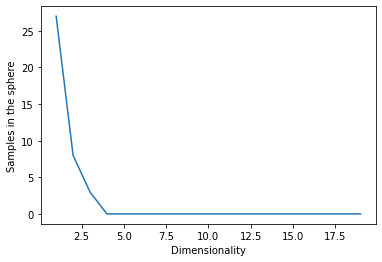

In [33]:
plt.plot(D_range,samples_in_sphere_list)
plt.xlabel("Dimensionality")
plt.ylabel("Samples in the sphere")

**Concentration of angles** (slides 20-22)

Draw vectors from a D-dimensional space, what is their expected angle?

In [34]:
def generate_points(D):
  X = np.random.rand(D,)
  Y = np.random.rand(D,)
  Z = np.random.rand(D,)
  W = np.random.rand(D,)
  return X, Y, Z, W

def compute_cos(a, b):
  cos = np.cos(np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b)))
  return cos

First, verify how cos of the angle between two random vectors. For defining two vectors we sample 4 random points.

$$a = X - Y$$
$$b = W - Z$$

In [35]:
N = 100
means_cos = []
D_range=range(5,1000)
for D in D_range:
  sum_cos = 0
  for _ in range(N):
    X, Y, Z, W = generate_points(D)
    cos = compute_cos(np.subtract(X,Y), np.subtract(W,Z))
    sum_cos += cos
  mean_cos = sum_cos/N
  means_cos.append(mean_cos)

Text(0, 0.5, 'cos')

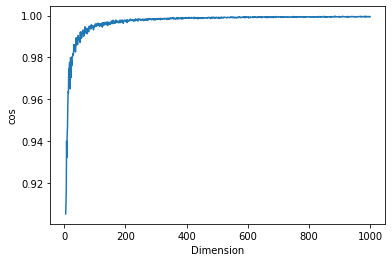

In [36]:
plt.plot(D_range, means_cos)
plt.xlabel("Dimension")
plt.ylabel("cos")

Now, verify the angle between vectors which form a triangle.

In [37]:
N = 100
means_cos = []
D_range=range(5,1000)
for D in D_range:
  sum_cos = 0
  for _ in range(N):
    X, Y, Z, W = generate_points(D)
    cos = compute_cos(np.subtract(X,Y), np.subtract(Z,Y))
#np.cos((np.dot(Y,Y)-np.dot(X,Y))/(2*np.dot(Y,Y)-2*np.dot(X,Y)))
    sum_cos += cos
  mean_cos = sum_cos/N
  means_cos.append(mean_cos)

Text(0, 0.5, 'cos')

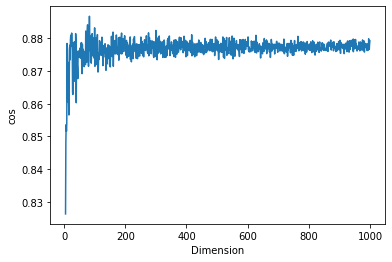

In [38]:
plt.plot(D_range, means_cos)
plt.xlabel("Dimension")
plt.ylabel("cos")